## Travelling salesman problem - To find the shortest roads that connects a set of cities

In [8]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Load Data
- node1 & node2: names of the nodes connected.
- trail: edge attribute indicating the abbreviated name of the trail for each edge. For example: rs = red square
- distance: edge attribute indicating trail length in miles.
- color: trail color used for plotting.
- estimate: edge attribute indicating whether the edge distance is estimated from eyeballing the trailmap (1=yes, 0=no) as some distances are not provided. This is solely for reference; it is not used for analysis.

In [9]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [10]:
edgelist

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


## Create Graph

In [11]:
g = nx.Graph()

In [12]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

<IPython.core.display.Javascript object>


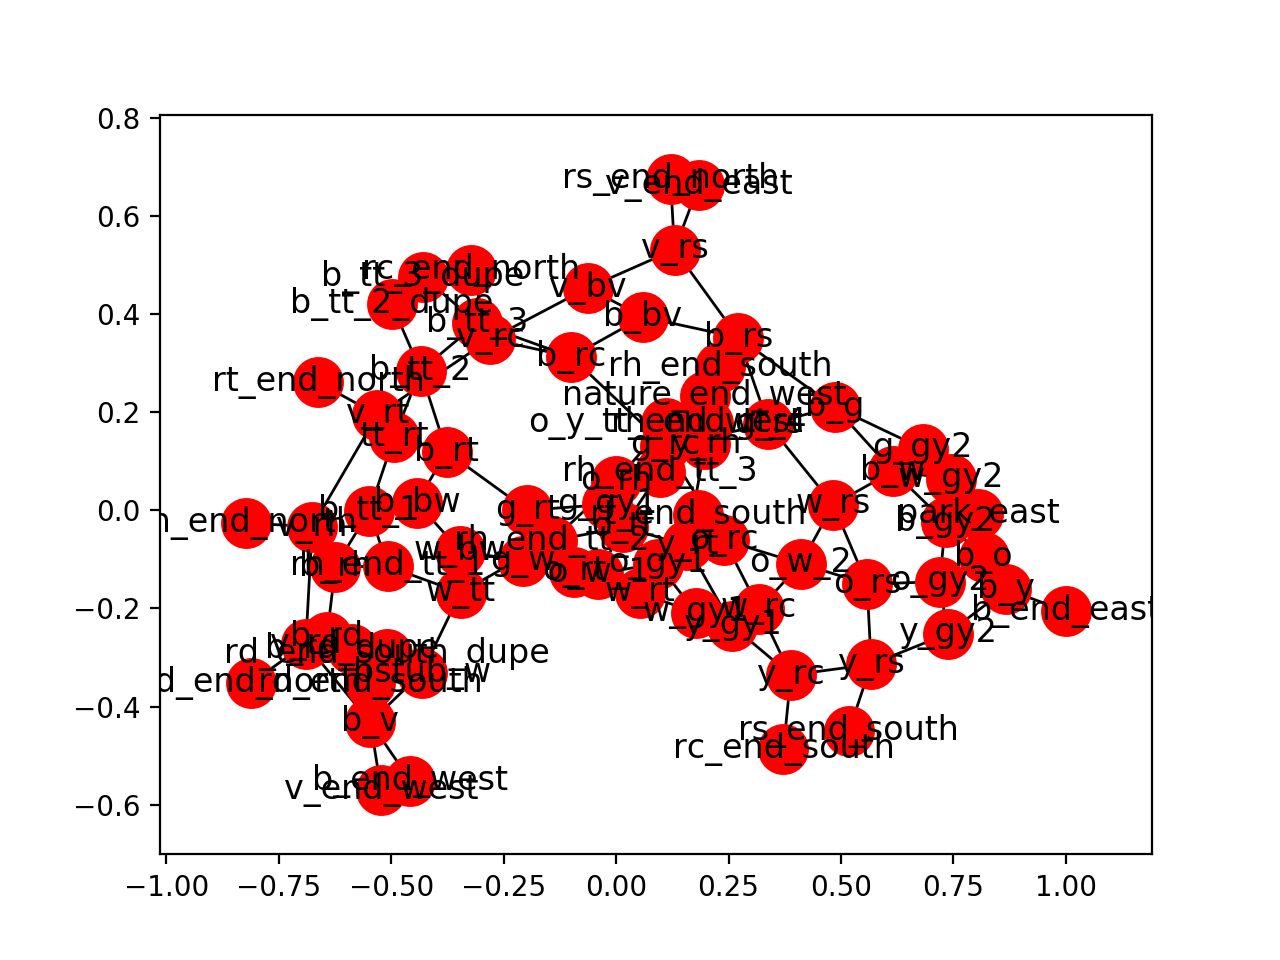

In [13]:
# draw the network 
nx.draw_networkx(g)

In [14]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

o_gy2
y_gy2
{'color': 'yellowgreen', 'estimate': 0, 'distance': 0.12, 'trail': 'gy2'}


In [15]:
g.nodes()

NodeView(('o_y_tt_end_west', 'y_rt', 'v_rh', 'bstub_w', 'b_rd_dupe', 'rc_end_south', 'v_rs', 'g_rt', 'rt_end_north', 'b_end_east', 'o_w_1', 'y_rh', 'rh_end_south', 'b_tt_1', 'b_rd', 'rs_end_north', 'b_w', 'y_gy2', 'rs_end_south', 'o_rh', 'b_gy2', 'b_bw', 'g_rs', 'g_w', 'b_g', 'o_rs', 'rh_end_tt_4', 'b_tt_3', 'rd_end_north', 'b_bv', 'rh_end_tt_1', 'w_bw', 'o_rt', 'o_tt', 'w_gy1', 'rc_end_north', 'v_bv', 'rh_end_north', 'v_rc', 'g_gy2', 'o_rc', 'b_rc', 'o_w_2', 'w_rt', 'y_gy1', 'w_tt', 'b_rs', 'v_end_east', 'tt_rt', 'w_rs', 'g_rc', 'o_gy1', 'v_rd', 'rd_end_south', 'y_rs', 'park_east', 'w_rc', 'b_o', 'rh_end_tt_3', 'b_tt_2', 'nature_end_west', 'v_rt', 'b_tt_3_dupe', 'b_v', 'rh_end_tt_2', 'o_gy2', 'b_rh', 'rd_end_south_dupe', 'w_gy2', 'b_rt', 'y_rc', 'v_end_west', 'b_tt_2_dupe', 'b_y', 'rt_end_south', 'g_gy1', 'b_end_west'))

In [16]:
g.edges(data=True)

EdgeDataView([('o_y_tt_end_west', 'nature_end_west', {'attr_dict': {'color': 'black', 'estimate': 0, 'distance': 0.16, 'trail': 'tt'}}), ('o_y_tt_end_west', 'o_rh', {'attr_dict': {'color': 'orange', 'estimate': 0, 'distance': 0.32, 'trail': 'o'}}), ('o_y_tt_end_west', 'y_rh', {'attr_dict': {'color': 'yellow', 'estimate': 0, 'distance': 0.26, 'trail': 'y'}}), ('y_rt', 'y_gy1', {'attr_dict': {'color': 'yellow', 'estimate': 0, 'distance': 0.31, 'trail': 'y'}}), ('y_rt', 'o_tt', {'attr_dict': {'color': 'forestgreen', 'estimate': 0, 'distance': 0.35, 'trail': 'nature'}}), ('y_rt', 'rt_end_south', {'attr_dict': {'color': 'red', 'estimate': 0, 'distance': 0.18, 'trail': 'rt'}}), ('y_rt', 'w_rt', {'attr_dict': {'color': 'red', 'estimate': 0, 'distance': 0.19, 'trail': 'rt'}}), ('y_rt', 'y_rh', {'attr_dict': {'color': 'yellow', 'estimate': 0, 'distance': 0.32, 'trail': 'y'}}), ('v_rh', 'v_rt', {'attr_dict': {'color': 'violet', 'estimate': 0, 'distance': 0.44, 'trail': 'v'}}), ('v_rh', 'b_rh', {

g.neighbors('v_end_west')

In [17]:
g.degree()

DegreeView({'o_y_tt_end_west': 3, 'v_rh': 4, 'bstub_w': 2, 'b_rd_dupe': 2, 'rc_end_south': 1, 'v_rs': 4, 'g_rt': 4, 'b_rc': 4, 'b_v': 5, 'g_rc': 4, 'rh_end_south': 1, 'b_tt_1': 4, 'b_rd': 4, 'b_w': 4, 'y_gy2': 3, 'o_rh': 4, 'b_gy2': 4, 'b_bw': 3, 'g_rs': 4, 'y_rc': 4, 'b_g': 4, 'rs_end_north': 1, 'rh_end_tt_4': 3, 'b_tt_3': 3, 'rd_end_north': 1, 'b_bv': 3, 'rh_end_tt_1': 3, 'w_tt': 4, 'o_rt': 3, 'o_tt': 5, 'park_east': 4, 'w_gy1': 4, 'rc_end_north': 1, 'v_bv': 3, 'rh_end_north': 1, 'v_rc': 4, 'g_gy2': 3, 'o_rc': 4, 'rt_end_north': 1, 'o_w_2': 4, 'w_rt': 4, 'b_o': 4, 'w_bw': 3, 'b_rs': 4, 'y_rh': 5, 'tt_rt': 4, 'w_rs': 4, 'v_rt': 4, 'o_w_1': 5, 'o_gy1': 4, 'y_rs': 4, 'v_rd': 4, 'rd_end_south': 3, 'o_rs': 4, 'v_end_east': 1, 'w_rc': 4, 'y_gy1': 3, 'rh_end_tt_3': 3, 'b_tt_2': 4, 'nature_end_west': 3, 'g_w': 3, 'b_tt_3_dupe': 2, 'b_end_east': 1, 'rh_end_tt_2': 3, 'o_gy2': 4, 'b_rh': 4, 'rd_end_south_dupe': 2, 'w_gy2': 4, 'b_rt': 4, 'rs_end_south': 1, 'rt_end_south': 1, 'v_end_west': 1, 'b_

In [18]:
g.has_edge('v_end_west','b_rd_dupe')

False